In [2]:
from google.colab import files
uploaded = files.upload()

Saving OnlineRetail.csv to OnlineRetail.csv


In [3]:
!pip install openpyxl plotly

In [6]:
import pandas as pd
df = pd.read_csv('/content/OnlineRetail.csv', encoding='ISO-8859-1')
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [7]:
print("Shape:", df.shape)

Shape: (541909, 8)


In [8]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       01-12-2010 08:26       2.55     17850.0  United Kingdom  
1       01-12-2010 08:26       3.39     17850.0  United Kingdom  
2       01-12-2010 08:26       2.75     17850.0  United Kingdom  
3       01-12-2010 08:26       3.39     17850.0  United Kingdom  
4       01-12-2010 08:26       3.39     17850.0  United Kingdom  
...                  ...        ...         ...             ...  
541904  09-12-2011 12:50       0.85     12680.0          France  
541905  09-12-2011 12:50       2.10     12680.0          France  
541906  09-12-2011 12:50       4.15     12680.0          France  
541907  09-12-2011 12:50       4.15     12680.0          France  
541908  09-12-2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]>

In [9]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


from matplotlib import pyplot as plt
_df_0['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Quantity', y='UnitPrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='UnitPrice', y='CustomerID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
print(df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())
print("Total Transactions:", df['InvoiceNo'].nunique())

01-02-2011 08:23 to 31-10-2011 17:19
Total Transactions: 25900


In [14]:
df = df.dropna(subset=['CustomerID'])
df = df.drop_duplicates()
df = df[(df['Quantity'] > 0) & (df['UnitPrice']) > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [15]:
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

In [18]:
print("Total Revenue:", df['TotalSales'].sum())
avg_order = df.groupby('InvoiceNo')['TotalSales'].sum().mean()
print("Avg Order Value:", avg_order)
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
print(top_products)

Total Revenue: 8887208.894
Avg Order Value: 479.56016047917126
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalSales, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/tmp/ipython-input-20-2175310560.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('InvoiceDate').resample('M')['TotalSales'].sum()


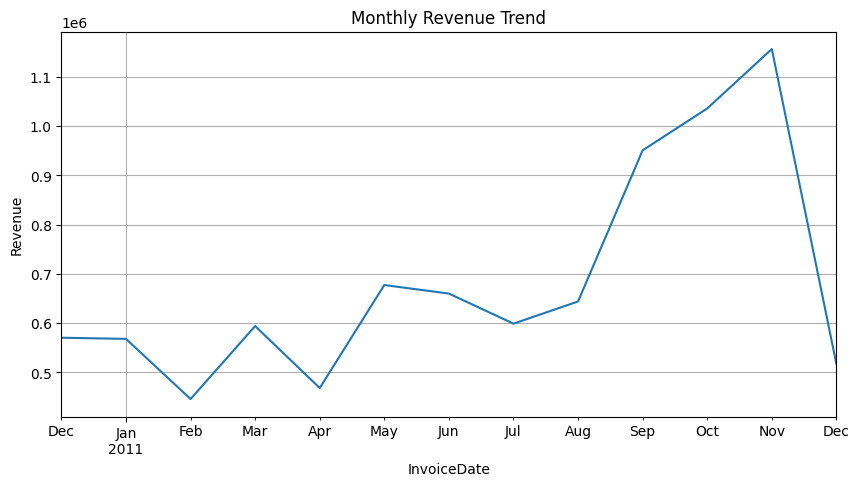

In [20]:
monthly_revenue = df.set_index('InvoiceDate').resample('M')['TotalSales'].sum()
plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


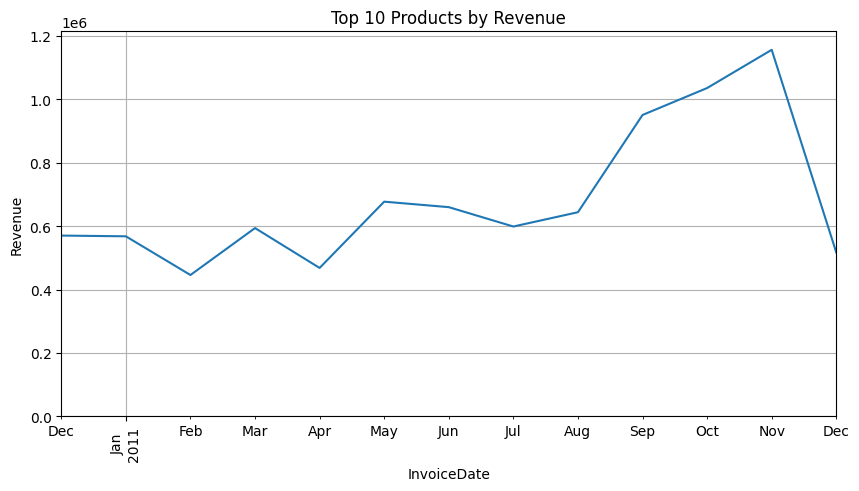

In [21]:
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Products by Revenue')
monthly_revenue.plot()
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [26]:
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).reset_index()
fig = px.bar(country_sales, x='Country', y='TotalSales', title='Total Sales by Country')
fig.show()

In [27]:
df.to_csv('/content/cleaned_online_retail.csv', index=False)


In [28]:
total_revenue = df['TotalSales'].sum()
print("Total Revenue:", round(total_revenue, 2))
avg_order = df.groupby('InvoiceNo')['TotalSales'].sum().mean()
print("Avg Order Value:", round(avg_order, 2))
transaction_count = df['InvoiceNo'].nunique()
print("Total Transactions:", transaction_count )

Total Revenue: 8887208.89
Avg Order Value: 479.56
Total Transactions: 18532


In [29]:
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
print("Top-Selling Products:\n", top_products)

Top-Selling Products:
 Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalSales, dtype: float64


/tmp/ipython-input-30-4099170782.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



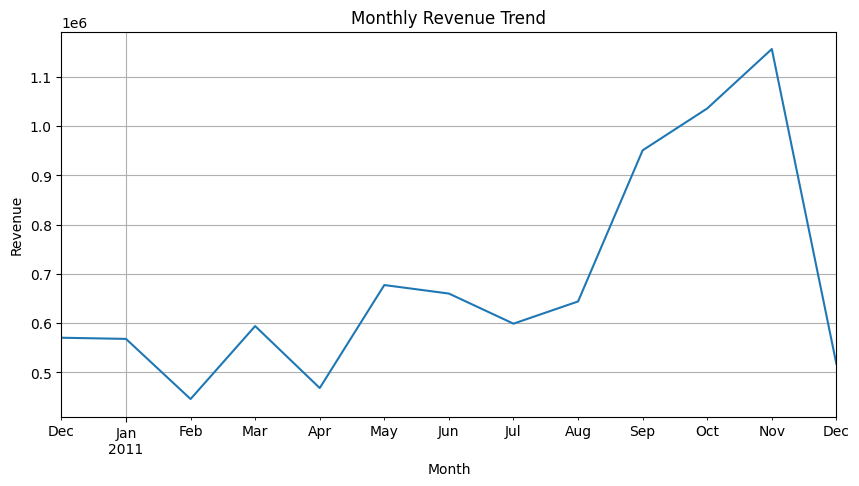

In [30]:
monthly_revenue = df.set_index('InvoiceDate').resample('M')['TotalSales'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [32]:
import plotly.express as px

country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(country_sales.head(10), x='Country', y='TotalSales',
             title='Top 10 Countries by Sales', color='TotalSales')
fig.show()


In [34]:
customer_sales = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
customer_freq = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
customer_behavior = pd.DataFrame({'TotalSpent': customer_sales, 'PurchaseFrequency': customer_freq})
customer_behavior.head(10)

,TotalSpent,PurchaseFrequency
CustomerID,,
12346.0,77183.60,1
12347.0,4310.00,7
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1
12352.0,2506.04,8
12353.0,89.00,1
12354.0,1079.40,1
12355.0,459.40,1


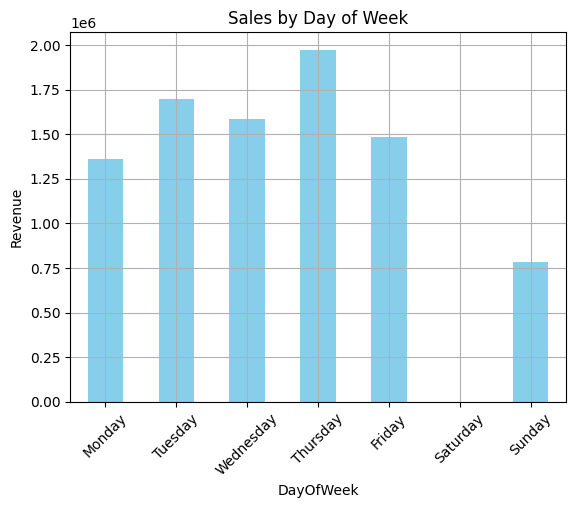

In [35]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

sales_by_day = df.groupby('DayOfWeek')['TotalSales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Sales by Day of Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
